In [33]:
import pandas as pd

In [28]:
adv=pd.read_csv('D:\\New folder\\Machine-Learning-with-Real-World-Projects-master\\Section 1\\code-LR-Teclov\\tvmarketing.csv')

In [29]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
adv.shape

(200, 2)

In [13]:
adv.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

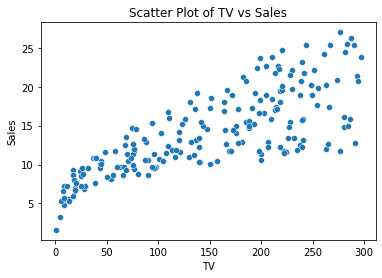

In [30]:
sns.scatterplot(x='TV', y='Sales', data=adv)
plt.title('Scatter Plot of TV vs Sales')
plt.show()

In [25]:
print(adv.dtypes)


TV       int64
Sales    int64
dtype: object


In [ ]:
#figuring M and c 
#y=c+m[TV] where y is Sales and x is TV 

# Preparing X and Y

In [31]:
x=adv['TV']

In [32]:
y=adv['Sales']

# Splitting Data Into Training and testing Sets

In [35]:
#preparing training and testing data
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [37]:
print(type(x_train))
print(type(x_test))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [38]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [39]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [42]:
#converting x train and test to 2D matrix even there is single feature for the observations


In [41]:
x_train = x_train.reshape(-1, 1)

# Using reshape to add a new axis to x_test
x_test = x_test.reshape(-1, 1)

# Performing linear Regression

In [44]:
#Residual sum square
#RSS=∑(i=1 to n)(yi-y)^2 
#where yi is observed sum vs yp is predicted 

from sklearn.linear_model import LinearRegression 

#creating Linear Regression Object
lr=LinearRegression()

#fit model lr.fit() 

lr.fit(x_train,y_train)

LinearRegression()

In [45]:
print(lr.intercept_) #gets c value 
print(lr.coef_) # m val

6.989665857411681
[0.04649736]


#y=6.989+0.0464*TV

# Making Predcitions

In [46]:
y_pred=lr.predict(x_test)

In [47]:
type(y_pred)

numpy.ndarray

# Computing RMSE and R^2


Text(0, 0.5, 'Sales')

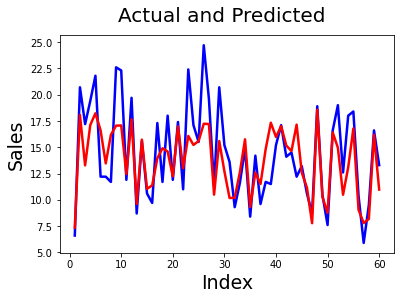

In [50]:
#actual values is in y_test and in y_pred for x_test we have prediction value 

c=[i for i in range(1,61,1)] 
f=plt.figure()
plt.plot(c,y_test,color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred,color="red",linewidth=2.5,linestyle="-")
f.suptitle('Actual and Predicted',fontsize=20) 
plt.xlabel('Index',fontsize=19) 
plt.ylabel('Sales',fontsize=19)

Text(0, 0.5, 'Sales')

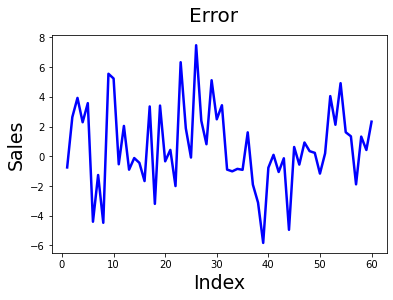

In [52]:
#Error 
c=[i for i in range(1,61,1)] 
f=plt.figure()
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-")
f.suptitle('Error',fontsize=20) 
plt.xlabel('Index',fontsize=19) 
plt.ylabel('Sales',fontsize=19)

In [56]:
#calcualting Mean Square error 
# r^2= 1-rss/Mss ho wclose to 1 model value 

from sklearn.metrics import mean_squared_error,r2_score 
mse=mean_squared_error(y_test,y_pred)

In [57]:
r_square=r2_score(y_test,y_pred)

In [58]:
print("Mean Square",mse) #model not matched 7% of values 
print("Root Square value",r_square)

Mean Square 7.975798532854849
Root Square value 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

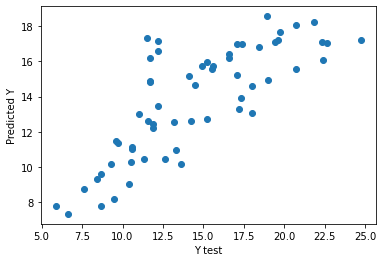

In [59]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test') 
plt.ylabel('Predicted Y')

In [ ]:
#rse =root of rss/df where df=n-2